# Assignment 5 - Datamining

Ben Heinze

5 April 2024

Datamining 347

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as m
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from ISLP import load_data
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

---

## Question 1

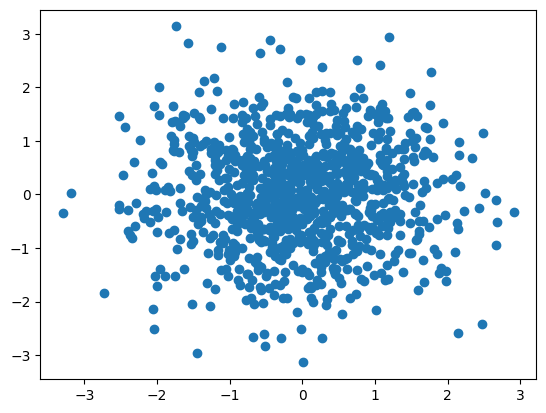

In [2]:
#generate 2D matrix data
mu = np.array([0,0])
Sigma = np.array([[1,0],[0,1]])
X1, X2 = np.random.multivariate_normal(mu, Sigma, 1000).T
D = np.array([X1.T, X2.T])
plt.scatter(D[0],D[1])
plt.show()

---

## Question 2a

RS: 
[[ 3.53553391 -1.41421356]
 [ 3.53553391  1.41421356]]

RDS: 
[[ 0.71522801  0.7517496   1.45050602 ...  3.54905177 -0.08827323
  -0.17667898]
 [ 2.64323417 -0.82106744  1.45326337 ... -0.49726702 -2.87915315
   2.49486806]]
Part 2a: Plotted RSD against D


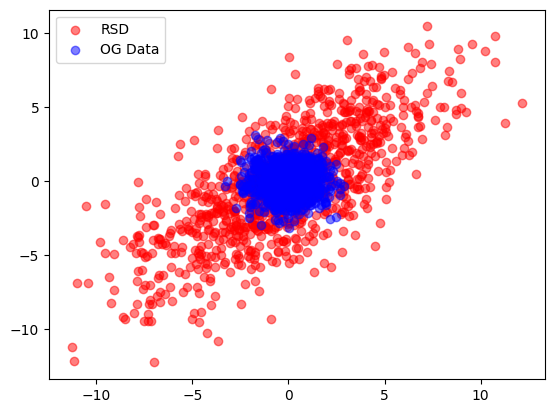

In [3]:
#setup matrices
t = (m.pi/4)
R = np.array([[m.cos(t), -m.sin(t)],[m.sin(t), m.cos(t)]]) #rotation
S = np.array([[5,0],[0,2]]) #Scale

#dot products
RS = np.dot(R, S)   
RSD = np.dot(RS, D)
print(f"RS: \n{RS}")
print(f"\nRDS: \n{RSD}")

#2a: scatter plot of transformed data
print("Part 2a: Plotted RSD against D")
plt.scatter(RSD[0], RSD[1], c="r", alpha=.5)
plt.scatter(D[0], D[1], c= "b", alpha=.5)
plt.legend(["RSD", "OG Data"])
plt.show()

## Question 2b Covariance of RS Data

In [4]:
print(np.cov(RSD))

[[14.42800819 10.62876428]
 [10.62876428 14.57457924]]


## Question 2c Total Variance

In [5]:
#2C: Total Variance
print("\n2c: Total Variance on RS Data")
print(np.var(RSD))


2c: Total Variance on RS Data
14.48699475117063


---

## Question 3a PCA plotting

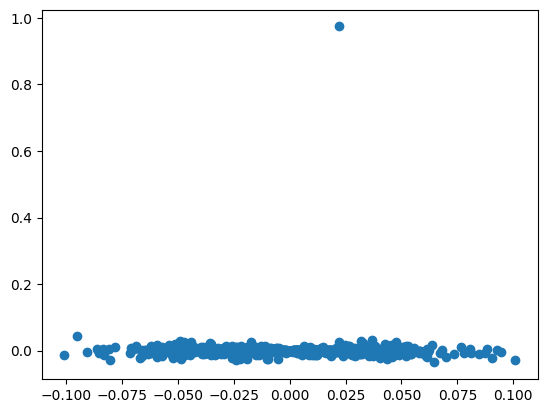

In [6]:
pca = PCA(n_components=2) #2d
pca.fit(RSD)    #fits data to PCA with 2 components

plt.scatter(pca.components_[0], pca.components_[1])
plt.show()

## Question 3b Sample Covariance

In [7]:
np.cov(pca.components_)

array([[ 1.00089631e-03, -2.16470547e-07],
       [-2.16470547e-07,  1.00055342e-03]])

## Question 3c Variance Ratio of PCA1 and PCA2

In [8]:
print(f"PCA1's Variance ratio: {pca.explained_variance_ratio_[0]}")
print(f"PCA2's Variance ratio: {pca.explained_variance_ratio_[1]}")

PCA1's Variance ratio: 1.0
PCA2's Variance ratio: 1.5452200887408637e-31


---

## Question 4.1 Plotting Boston Two PCAs

Question 4.1 (plot)
[[-2.03968613  0.49026921]
 [-1.30409223 -0.18964184]
 [-2.34018838  0.91454436]
 ...
 [-0.27497263  0.79730625]
 [-0.17624425  0.51298566]
 [ 0.30223062 -0.59643563]]


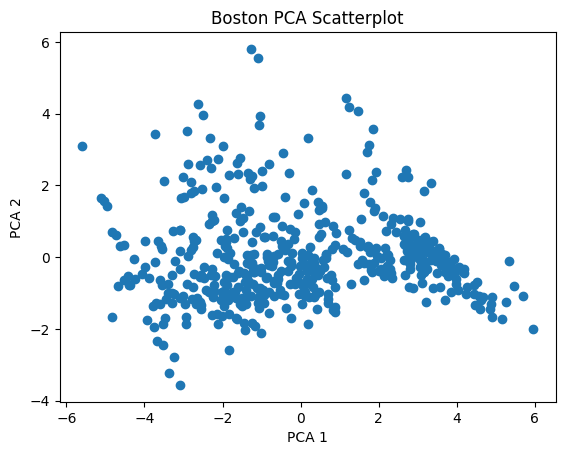

In [9]:
# load dataset
ds = load_data('Boston')
print("Question 4.1 (plot)")
# 4.1 Standardize/normalize dataset
boston = StandardScaler().fit_transform(ds)
boston = pd.DataFrame(boston)
# Make PCA with 2 dimensions
boston2D = PCA(n_components=2)
ds2D = boston2D.fit_transform(boston)
print(ds2D)
# Plot data
plt.scatter(ds2D[:,0], ds2D[:,1])
plt.title("Boston PCA Scatterplot")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

---

## Question 4.2 Fraction of Total variance

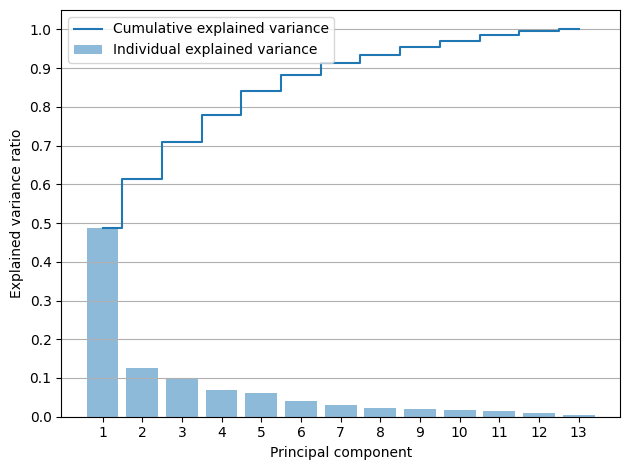

In [10]:
boston13D = PCA(n_components=13).fit(boston) # 13 dimensions
# plots data
ratioSum = boston13D.explained_variance_ratio_.cumsum()
plt.bar(range(1,len(ratioSum)+1), boston13D.explained_variance_ratio_, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1,len(ratioSum)+1), ratioSum, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.ylim (0,1.05)
plt.xticks(range(1,14))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel('Principal component')
plt.legend(loc='best')
plt.tight_layout()
plt.grid(axis='y')
plt.show()

---

## Question 4.3.1

For 90% capture, we need 7 Principle Components

## Question 4.3.2

61% of variance is captured through the first two Principle Components

---

## Question 4.4

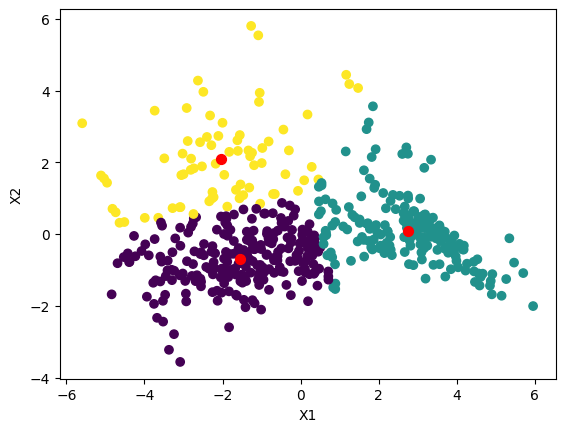

In [11]:
kmeans = KMeans(n_clusters=3, init='k-means++')
pred_cluster_labels = kmeans.fit_predict(ds2D)

plt.scatter(ds2D[:,0],ds2D[:,1], c=pred_cluster_labels)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='red', s=50)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

---

## Question 4.5

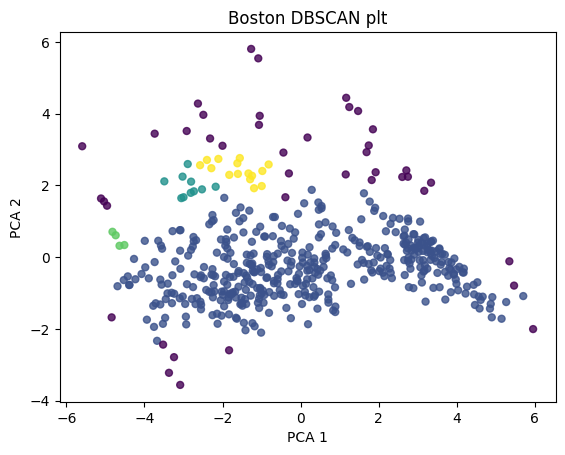

In [12]:
boston2D = PCA(n_components=2)
ds2D = boston2D.fit_transform(boston)

db = DBSCAN().fit(ds2D)
labels = db.labels_
plt.scatter(ds2D[:, 0], ds2D[:, 1], c=labels, cmap='viridis', s=25, alpha=0.8)
plt.title("Boston DBSCAN plt")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()